GRIP : The Sparks Foundation
Data Science and Business Analytics Intern
# Author : vishva patel

# Task 1 : Prediction Using Supervised ML
Problem Statement : Predict the perecentage of the student based on the no. of hours student studied using Simple Linear Regression model which involves two variables.

# Importing Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


# Loading Dataset

In [2]:
# Loading Dataset
df = pd.read_csv('../input/tsf-datasets/student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for Null values in the dataset

In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Plotting the score distribution

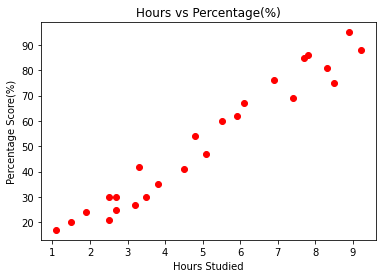

In [6]:
plt.scatter(df['Hours'], df['Scores'], color = 'red')
plt.title('Hours vs Percentage(%)')
plt.xlabel('Hours Studied')
plt.ylabel("Percentage Score(%)")
plt.show()


# Preparing the data for Training

In [7]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values


# Splitting Data into Training and Testing sets

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# Training the Model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
print("Model Trained!")


Model Trained!


# Plotting the Regression Line

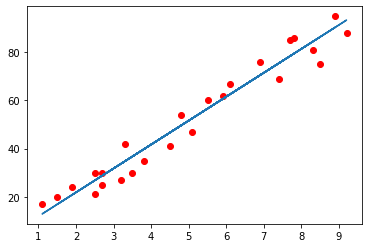

In [10]:
line = model.coef_*x + model.intercept_
plt.scatter(x, y, color = 'red')
plt.plot(x, line)
plt.show()


# Making Predictions

In [11]:
print(x_test)
y_pred = model.predict(x_test)


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]]


# Actual vs Predicted data Comparison

In [12]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
df1


,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


# Testing the model with Custom data

In [13]:

hrs = [[3.7]]
predict = model.predict(hrs)
print("No. of Hours = {}".format(hrs))
print("Predicted Score = {}".format(predict[0]))


No. of Hours = [[3.7]]
Predicted Score = 38.71641410925761


# Evaluating the model using Error Parameters

In [14]:
from sklearn import metrics
print('Mean Absolute Error(MAE) :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE) :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error(MAE) : 4.130879918502482
Mean Squared Error(MSE) : 20.33292367497996
Root Mean Squared Error(RMSE) : 4.509204328368805


# What will be predicted score if a student study for 9.25 hrs in a day?

In [15]:
# Testting the model to redict the percentage of student if he studies for 9.25 hours as given
hours = 9.25
pred = model.predict(np.array(hours).reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.89272889341652
